In [1]:
#Neural Network classification with Pytorch

#classification is a problem of predicting weather something is one thing or another(there can be multiple things as the options)

#Make classification data and get it ready

import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X,y=make_circles(n_samples,
                noise=0.3,
                random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
print(f"First 5 of X:{X[:5]}")
print(f"First 5 of y:{y[:5]}")

First 5 of X:[[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
First 5 of y:[1 1 1 1 0]


In [4]:
#Create a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y})
circles.head(10)

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


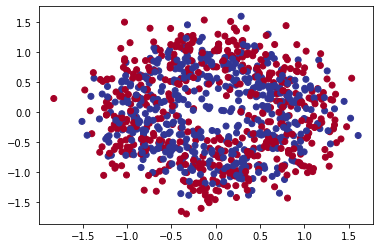

In [5]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],
                c=y,
                cmap=plt.cm.RdYlBu)

In [6]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [7]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [8]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [10]:
#Model Building
#let's Build a model to classify our blue and red dots.
#1.Setup device agonastic code so our code will run on an accelerate(GPU) if there is one 
#2.Construct a Model by using `nn.Module` 
#3.Define loss function and optimizer
#4.Create training and testing loop

In [11]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [12]:
#Now we've setup device agnostic code,let's create a model:
#1.subclass `nn.Module`(almost all models of pytorch subclass nn.Module)
#2.Create 2 nn.Linear() layers that are capable of handling the shapes of our data
#3.Define a forward() method that outlines the forward pass(or forward computation) of the model
#4.instatiate an instance of our model class and send it to target device 

In [36]:
from sklearn import datasets
#1.Construct a model that subclass nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        #2.Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1=nn.Linear(in_features=2,out_features=5) #takes 2 features and upscale to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 features from previous layer and output a single feature(same shape as y)
    
    #3.Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_2(self.layer_1(x)) #x----->layer1----->layer2----->output
 
#4.Instatiate an instance of our model class and send it to the target device   
model_0=CircleModelv0().to(device)
model_0

   

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [32]:
#or u can create model like this also
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers_seq=nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
        )
    
    def forward(self,x):
        return self.two_layers_seq
    
model_1=CircleModelv1().to(device)
model_1

CircleModelv1(
  (two_layers_seq): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [34]:
#Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
next(model_0.parameters()).device


device(type='cpu')

In [37]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3271, -0.4885],
                      [-0.6266,  0.2162],
                      [-0.3908,  0.2264],
                      [ 0.3365,  0.5787],
                      [ 0.6631,  0.5641]])),
             ('layer_1.bias',
              tensor([-0.1590, -0.5518,  0.4459,  0.6198,  0.1081])),
             ('layer_2.weight',
              tensor([[-0.0599,  0.3537, -0.1940, -0.1230,  0.3997]])),
             ('layer_2.bias', tensor([-0.4168]))])